In [ ]:
#Install pystan (if not already installed)
#Code should be disabled after first run

#!conda install -c conda-forge pystan
#!pip install pystan

In [ ]:
#Install fbprophet (if not already installed)
#Code should be disabled after first run

#!conda install -c conda-forge fbprophet -y
#!pip install fbprophet

In [ ]:
#Upgrade plotly after installing fbprophet
#Code should be disabled after first run

#!pip install --upgrade plotly

In [23]:
#Import dependencies

import pandas as pd

from fbprophet import Prophet

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import scipy.stats

import wordcloud
# from alphaVantageAPI.alphavantage import AlphaVantage 

In [3]:
df = pd.read_csv('data/WMT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.037027,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036887,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.036466,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.036466,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035905,870400


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12242.000000,12242.000000,12242.000000,12242.000000,12242.000000,1.224200e+04
mean,33.323517,33.640010,33.008329,33.329019,27.098417,7.527616e+06
std,34.336433,34.632807,34.052622,34.342539,31.485295,6.279231e+06
min,0.015625,0.015625,0.014404,0.015625,0.009031,0.000000e+00
25%,1.332031,1.352540,1.320313,1.335938,0.836820,3.835650e+06
50%,14.843750,14.937500,14.687500,14.875000,9.767956,6.278500e+06
75%,55.240002,55.933124,54.637499,55.250000,40.818146,9.515550e+06
max,153.600006,153.660004,151.660004,152.789993,152.233536,1.318336e+08


In [5]:
priceVolume = df[['Close','Volume']]
priceVolume.head()

,Close,Volume
0,0.064453,2508800
1,0.064209,972800
2,0.063477,1945600
3,0.063477,409600
4,0.062500,870400


In [30]:
corr = scipy.stats.linregress(priceVolume)
corr.rvalue

0.34706411528828335

In [10]:
# Select only the important features i.e. the date and price
data = df[["Date","Close"]] # select Date and Price

# Rename the features: These names are NEEDED for the model fitting
datePrice = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
datePrice.head(5)

,ds,y
0,1972-08-25,0.064453
1,1972-08-28,0.064209
2,1972-08-29,0.063477
3,1972-08-30,0.063477
4,1972-08-31,0.062500


In [11]:
model = Prophet(daily_seasonality=True)
model.fit(datePrice)
datePrice.tail()

,ds,y
12237,2021-03-08,127.879997
12238,2021-03-09,128.889999
12239,2021-03-10,132.179993
12240,2021-03-11,132.130005
12241,2021-03-12,134.119995


In [12]:
future_df = model.make_future_dataframe(periods=365)
future_df.tail()

,ds
12602,2022-03-08
12603,2022-03-09
12604,2022-03-10
12605,2022-03-11
12606,2022-03-12


In [13]:
predictions = model.predict(future_df)
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
12602,2022-03-08,124.395472,115.894695,132.289882,123.618766,124.932031,-0.512268,-0.512268,-0.512268,-0.121564,...,0.034259,0.034259,0.034259,-0.424963,-0.424963,-0.424963,0.0,0.0,0.0,123.883203
12603,2022-03-09,124.413724,116.372130,131.714665,123.627803,124.953701,-0.548138,-0.548138,-0.548138,-0.121564,...,-0.002448,-0.002448,-0.002448,-0.424126,-0.424126,-0.424126,0.0,0.0,0.0,123.865586
12604,2022-03-10,124.431976,116.099405,131.106183,123.636840,124.975349,-0.555978,-0.555978,-0.555978,-0.121564,...,-0.014069,-0.014069,-0.014069,-0.420344,-0.420344,-0.420344,0.0,0.0,0.0,123.875998
12605,2022-03-11,124.450229,116.201081,131.738164,123.645896,124.996897,-0.581593,-0.581593,-0.581593,-0.121564,...,-0.046085,-0.046085,-0.046085,-0.413944,-0.413944,-0.413944,0.0,0.0,0.0,123.868635
12606,2022-03-12,124.468481,116.169759,132.098694,123.656878,125.018445,-0.511641,-0.511641,-0.511641,-0.121564,...,0.015196,0.015196,0.015196,-0.405272,-0.405272,-0.405272,0.0,0.0,0.0,123.956840


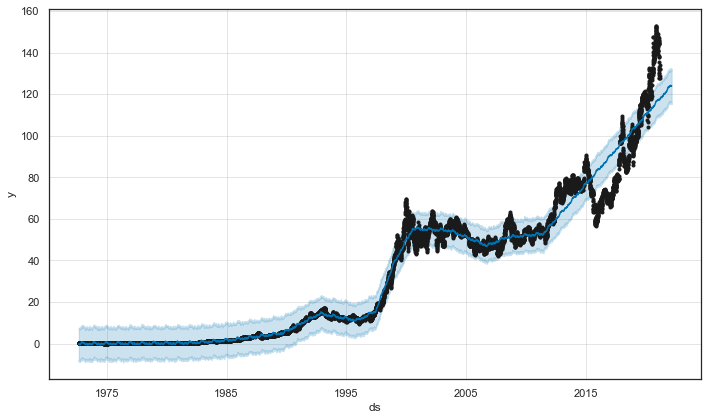

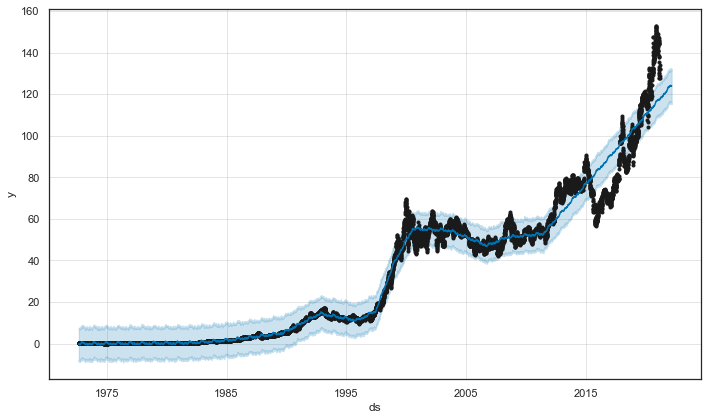

In [14]:
model.plot(predictions)

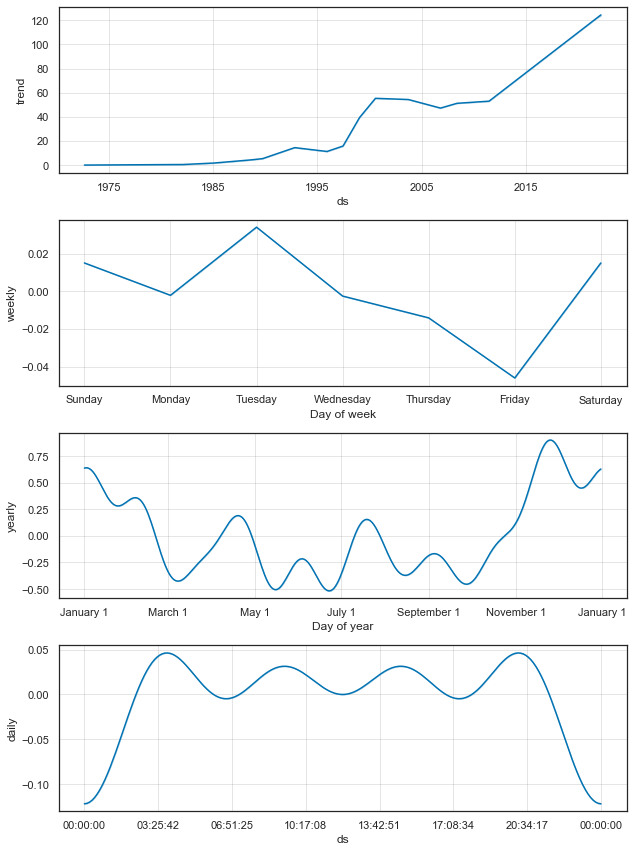

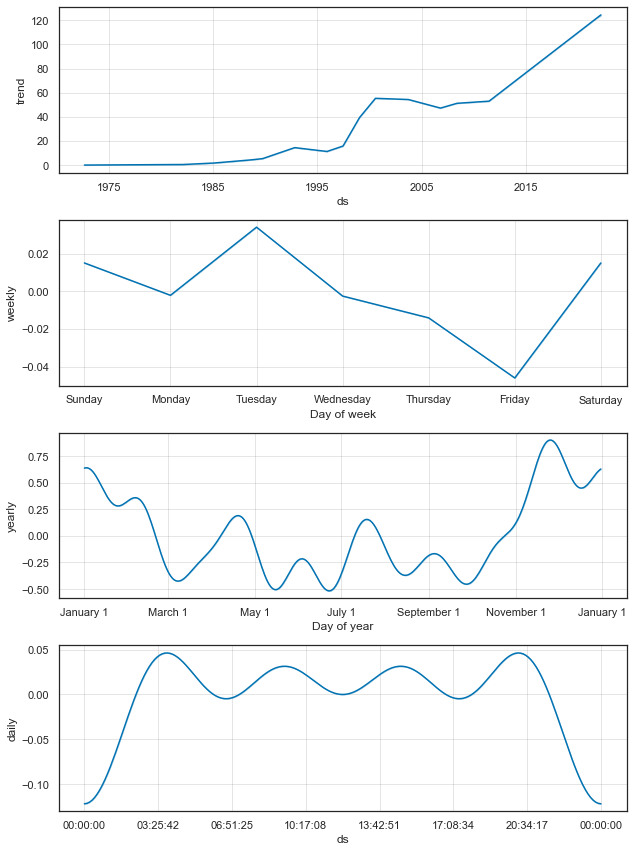

In [15]:
model.plot_components(predictions)

In [31]:
from fbprophet.diagnostics import cross_validation
priceCV = cross_validation(model, initial='1095 days', period='180 days', horizon = '365 days')
priceCV.head()

INFO:fbprophet:Making 91 forecasts with cutoffs between 1975-11-04 00:00:00 and 2020-03-12 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1975-11-05,0.053216,0.048791,0.057678,0.058105,1975-11-04
1,1975-11-06,0.052902,0.048523,0.057153,0.056641,1975-11-04
2,1975-11-07,0.052789,0.048546,0.056809,0.058105,1975-11-04
3,1975-11-10,0.052226,0.048000,0.056606,0.058594,1975-11-04
4,1975-11-11,0.052214,0.048067,0.056454,0.058594,1975-11-04


In [32]:
priceCV

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1975-11-05,0.053216,0.048791,0.057678,0.058105,1975-11-04
1,1975-11-06,0.052902,0.048523,0.057153,0.056641,1975-11-04
2,1975-11-07,0.052789,0.048546,0.056809,0.058105,1975-11-04
3,1975-11-10,0.052226,0.048000,0.056606,0.058594,1975-11-04
4,1975-11-11,0.052214,0.048067,0.056454,0.058594,1975-11-04
...,...,...,...,...,...,...
22928,2021-03-08,106.274746,100.084282,112.598712,127.879997,2020-03-12
22929,2021-03-09,106.312261,100.309069,112.273624,128.889999,2020-03-12
22930,2021-03-10,106.301011,100.062216,111.940209,132.179993,2020-03-12
22931,2021-03-11,106.328680,100.189959,112.247436,132.130005,2020-03-12


In [33]:
from fbprophet.diagnostics import performance_metrics
priceMetrics = performance_metrics(priceCV)
priceMetrics.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,135.246557,11.629555,7.774748,0.249508,0.215300,0.153776
325,362 days,136.047987,11.663961,7.796448,0.250627,0.216449,0.152279
326,363 days,136.876428,11.699420,7.810366,0.251275,0.218790,0.152857
327,364 days,136.562447,11.685994,7.806612,0.251841,0.218841,0.152582
328,365 days,137.119542,11.709805,7.825431,0.252668,0.220625,0.151030


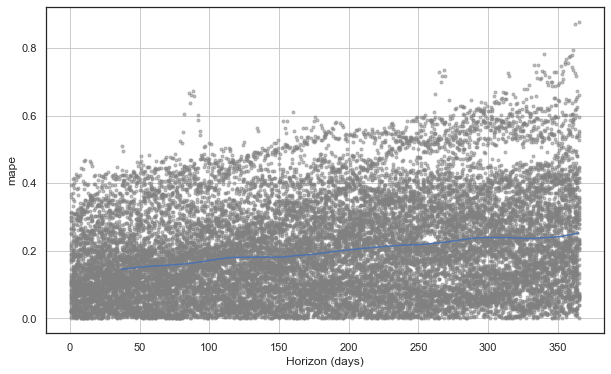

In [34]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(priceCV, metric = 'mape')

In [16]:
data2 = df[["Date","Volume"]] # select Date and Volume

# Rename the features: These names are NEEDED for the model fitting
dateVolume = data2.rename(columns = {"Date":"ds","Volume":"y"}) #renaming the columns of the dataset
dateVolume.head(5)

,ds,y
0,1972-08-25,2508800
1,1972-08-28,972800
2,1972-08-29,1945600
3,1972-08-30,409600
4,1972-08-31,870400


In [17]:
model2 = Prophet(daily_seasonality=True)
model2.fit(dateVolume)
dateVolume.tail()

,ds,y
12237,2021-03-08,13651600
12238,2021-03-09,10631100
12239,2021-03-10,14959700
12240,2021-03-11,11822600
12241,2021-03-12,9473500


In [18]:
future2_df = model2.make_future_dataframe(periods=365)
future2_df.tail()

,ds
12602,2022-03-08
12603,2022-03-09
12604,2022-03-10
12605,2022-03-11
12606,2022-03-12


In [19]:
predictions2 = model2.predict(future_df)
predictions2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
12602,2022-03-08,8.653585e+06,3.207342e+06,1.439021e+07,8.444831e+06,9.003882e+06,188632.294011,188632.294011,188632.294011,-978613.628844,...,-30117.771842,-30117.771842,-30117.771842,1.197364e+06,1.197364e+06,1.197364e+06,0.0,0.0,0.0,8.842218e+06
12603,2022-03-09,8.653123e+06,3.474851e+06,1.459210e+07,8.443511e+06,9.007910e+06,222787.647108,222787.647108,222787.647108,-978613.628844,...,82891.800626,82891.800626,82891.800626,1.118509e+06,1.118509e+06,1.118509e+06,0.0,0.0,0.0,8.875910e+06
12604,2022-03-10,8.652660e+06,3.166825e+06,1.463703e+07,8.442192e+06,9.010342e+06,238771.441362,238771.441362,238771.441362,-978613.628844,...,183781.791734,183781.791734,183781.791734,1.033603e+06,1.033603e+06,1.033603e+06,0.0,0.0,0.0,8.891431e+06
12605,2022-03-11,8.652197e+06,2.795003e+06,1.434426e+07,8.440872e+06,9.012205e+06,182661.891054,182661.891054,182661.891054,-978613.628844,...,217256.056372,217256.056372,217256.056372,9.440195e+05,9.440195e+05,9.440195e+05,0.0,0.0,0.0,8.834859e+06
12606,2022-03-12,8.651735e+06,3.080621e+06,1.463927e+07,8.439591e+06,9.014069e+06,-5133.158755,-5133.158755,-5133.158755,-978613.628844,...,122326.619139,122326.619139,122326.619139,8.511539e+05,8.511539e+05,8.511539e+05,0.0,0.0,0.0,8.646601e+06


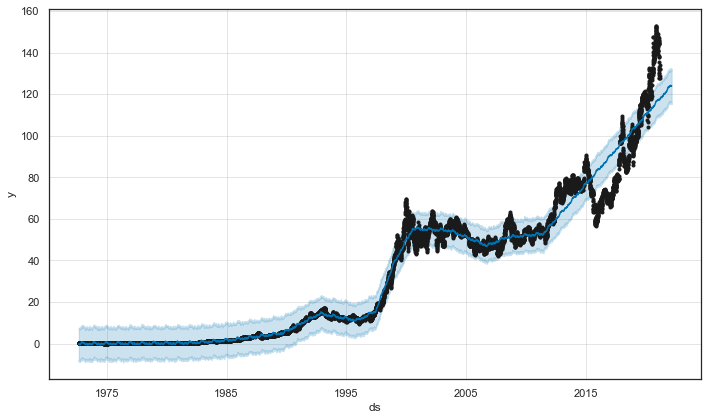

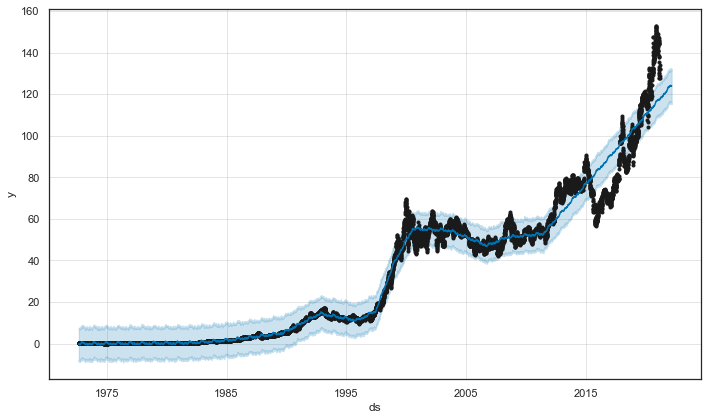

In [20]:
model.plot(predictions)

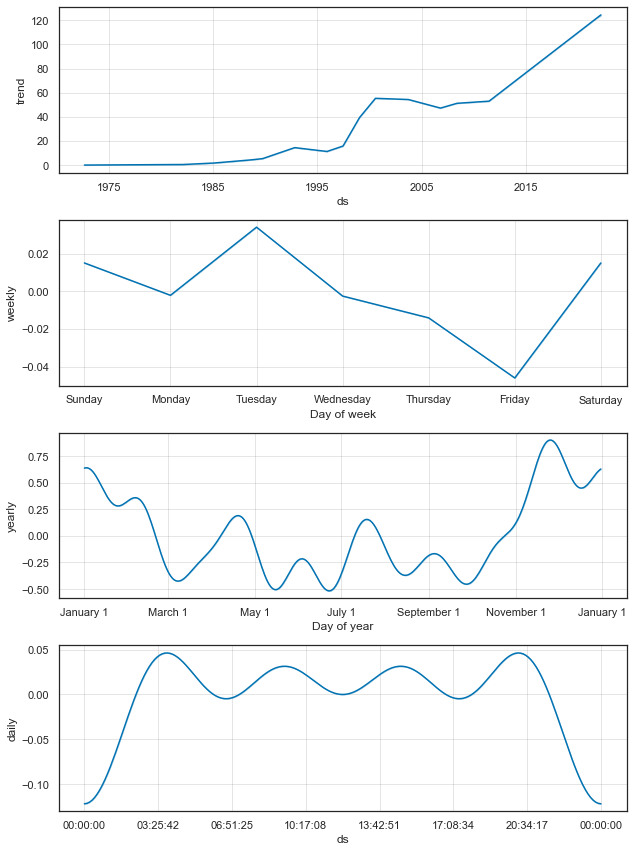

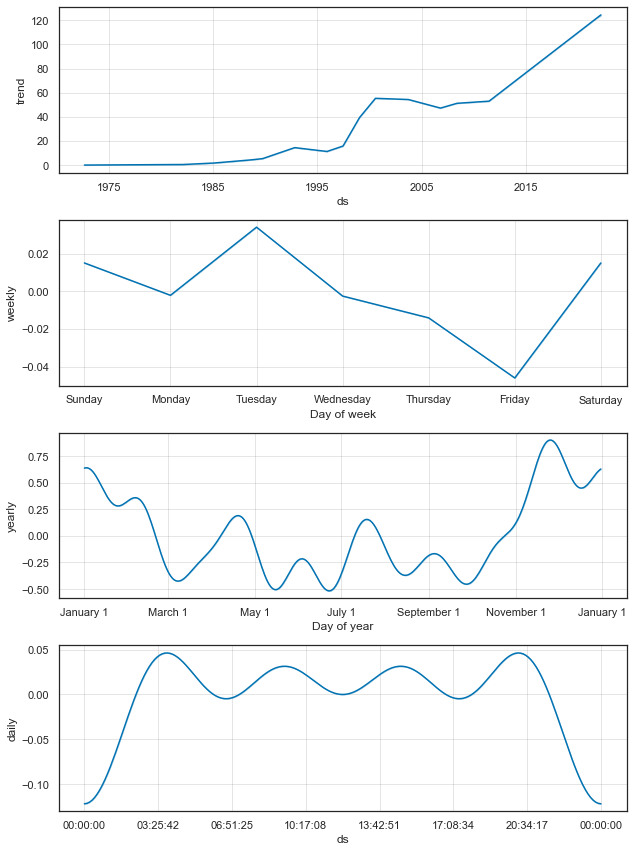

In [21]:
model.plot_components(predictions)